<a href="https://colab.research.google.com/github/virsalee27/Kuis_2206103_PCD/blob/main/4_Pendeteksi_tepi_pada_citra_Noisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca Gambar dengan derau salt-and-pepper
image = cv2.imread('/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg', cv2.IMREAD_GRAYSCALE)

# Menambahkan derau salt-and-pepper (opsional jika gambar tidak mengandung derau)
# noise_img = np.copy(image)
# cv2.randu(noise_img, 0, 255)
# noise_img[noise_img < 20] = 0
# noise_img[noise_img > 230] = 255

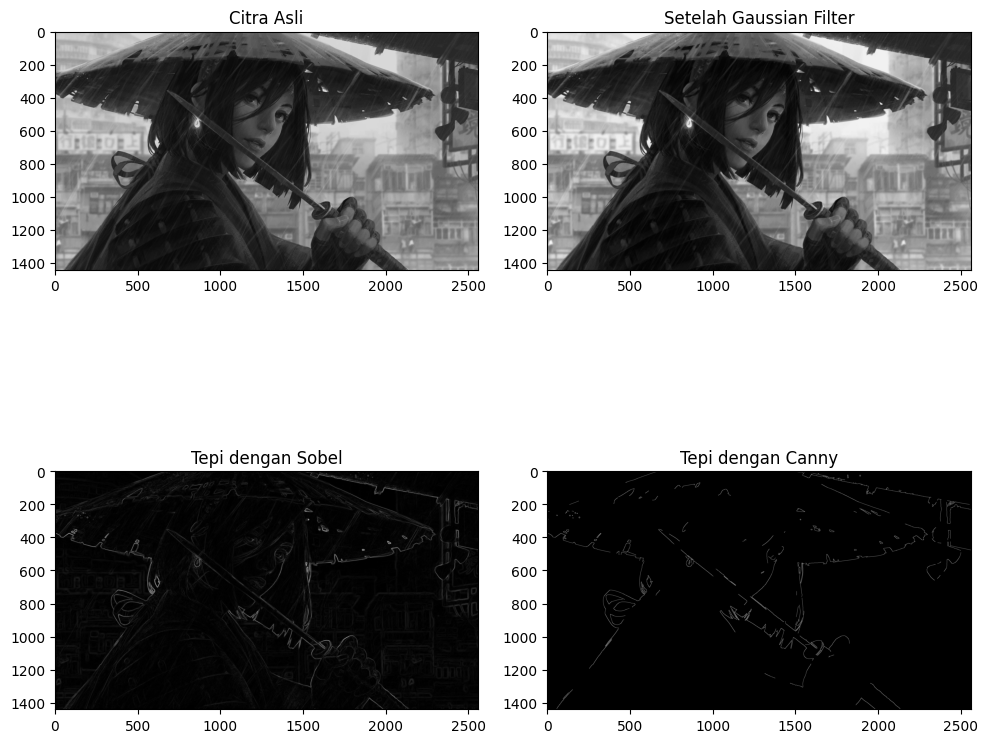

In [4]:
# Langkah 2: Terapkan Gaussian Filter untuk Mengurangi Derau
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Langkah 3: Deteksi Tepi Menggunakan Sobel
sobel_x = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Langkah 4: Deteksi Tepi Menggunakan Canny
canny_edges = cv2.Canny(gaussian_blurred, 100, 200)

# Langkah 5: Perbandingan Hasil
plt.figure(figsize=(10, 10))

# Citra Asli
plt.subplot(2, 2, 1)
plt.title("Citra Asli")
plt.imshow(image, cmap='gray')

# Citra Setelah Gaussian Filter
plt.subplot(2, 2, 2)
plt.title("Setelah Gaussian Filter")
plt.imshow(gaussian_blurred, cmap='gray')

# Deteksi Tepi dengan Sobel
plt.subplot(2, 2, 3)
plt.title("Tepi dengan Sobel")
plt.imshow(sobel_magnitude, cmap='gray')

# Deteksi Tepi dengan Canny
plt.subplot(2, 2, 4)
plt.title("Tepi dengan Canny")
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()

# Analisis Hasil

* Citra Asli: Menampilkan gambar yang memiliki derau "salt-and-pepper", yang mengganggu deteksi tepi.
* Setelah Gaussian Filter: Penghalusan menggunakan filter Gaussian mengurangi derau, menghaluskan citra dan membuatnya lebih mudah untuk mendeteksi tepi.
* Tepi dengan Sobel: Mendeteksi tepi berdasarkan perubahan intensitas dalam dua arah (horizontal dan vertikal). Namun, deteksi Sobel bisa kurang presisi di sekitar area yang berderau, dan menghasilkan garis yang lebih kasar atau terputus-putus.
* Tepi dengan Canny: Mendeteksi tepi dengan lebih halus dan akurat karena menggunakan teknik penghalusan dan pengendalian ambang batas untuk menekankan tepi yang signifikan. Canny mampu mendeteksi tepi lebih baik di area yang memiliki derau karena memiliki mekanisme penghalusan dan penyesuaian ambang yang lebih canggih.

# Kesimpulan

* Sobel efektif untuk deteksi tepi sederhana, namun kurang baik dalam citra dengan derau. Hasil deteksi tepi Sobel mungkin lebih kasar dan lebih sensitif terhadap derau.
* Canny lebih efektif dalam mendeteksi tepi dengan akurasi tinggi, terutama pada citra dengan derau. Dengan penghalusan Gaussian dan teknik lanjutan seperti pelacakan berbasis histeresis, Canny menghasilkan tepi yang lebih bersih dan lebih presisi.

Jika akurasi tepi sangat penting dan citra mengandung derau, Canny lebih direkomendasikan karena keunggulannya dalam mengurangi derau dan meningkatkan ketajaman tepi.